In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/DELL/archive (3)/heart.csv")
data


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = data.drop('trtbps', axis=1)  
y = data['chol'] 

In [4]:
data=pd.get_dummies(data,columns=['exng'],drop_first=True)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall,output,exng_1
0,63,1,3,145,233,1,0,150,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1.2,1,1,3,0,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
dt_classifier = DecisionTreeClassifier()


In [7]:
dt_classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [8]:
y_pred = dt_classifier.predict(X_test)
y_pred


array([275, 290, 141, 564, 254, 175, 243, 293, 284, 274, 183, 271, 335,
       172, 204, 236, 209, 184, 309, 172, 228, 283, 236, 302, 241, 222,
       274, 262, 293, 257, 263, 206, 266, 206, 226, 256, 245, 255, 199,
       262, 222, 221, 206, 216, 261, 248, 204, 209, 225, 293, 256, 309,
       201, 340, 299, 176, 254, 180, 187, 282, 243], dtype=int64)

In [9]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         126       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         0
         164       0.00      0.00      0.00         1
         166       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         1
         168       0.00      0.00      0.00         1
         172       0.00      0.00      0.00         0
         175       0.00      0.00      0.00         0
         176       0.00      0.00      0.00         0
         180       0.00      0.00      0.00         0
         183       0.00      0.00      0.00         0
         184       0.00      0.00      0.00         0
         187       0.00      0.00      0.00         0
         188       0.00      0.00      0.00         1
         192       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         1
         196       0.00      0.00      0.00         1
         199       1.00    

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classif

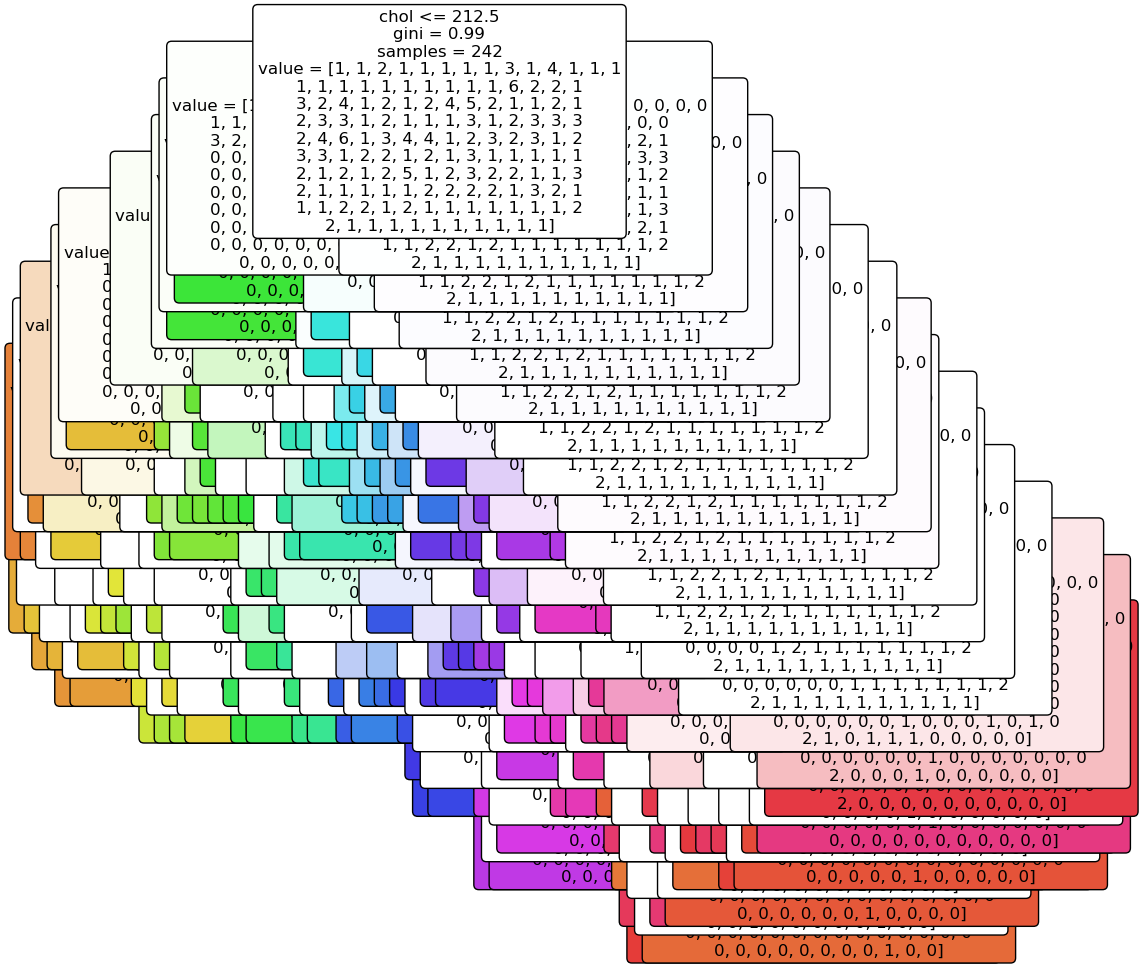

In [12]:
plt.figure(figsize=(10,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(),rounded=True, fontsize=12)
plt.show()